<a href="https://colab.research.google.com/github/DenaAlharbi/COE292-PROJECT/blob/main/COE292_F06_2_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#                                               COE292 Term 242 Project : Advanced IoT Agriculture

**Group No. 2**

**Section**: F06

**Group Members:**

| Group member name          | ID |
| :------------------: | :--------------: |
| Shahad Alshamrani    | 202245720 |
| Dena Alharbi         | 202250560 |
| Farah Hammad         | 202257640 |
| Mariam Aldhamen      | 202242480 |
| Fatemah Almarhoon    | 202272760 |

#### Contributions:         

|names         |Percentage of work                                      |
| :------------- | :------------------------------------------------------- |
| Shahad Alshamrani      | Percentage of work 20%    |
|    Dena Alharbi       | Percentage of work 20%|
|Farah Hammad| Percentage of work 20%|
|Mariam Aldhamen | Percentage of work 20%  |
| Fatemah Almarhoon |Percentage of work 20%   |

---




# Summary of Classifocation Problem



Our data is about Advanced IoT Agriculture with 30,000 entries and 14 columns that are taken from a student's master’s thesis research. The data studies the quality of plants that grow in an IoT greenhouse compared to other plants that grow in a traditional greenhouse, then classified them into 6 different classes according to some significant features such as:

Average of chlorophyll in the plant (ACHP), which has a main role in plants' nutrition by performing photosynthesis process, average root diameter (ARD), which is directly connected to the plants ability to absorb water and nutrients from the soil, and plant height rate (PHR), which is measuring the dynamic growth of the plant over time and directly affected by the plants nutrition.   

Since most of our team members are from computer-related majors, we selected this data because it develops a new technological footprint in one of the most important life fields which can enhance automation in smart greenhouses.

No doubt it is difficult to classify such problems, especially when we consider the high dimensionality of data gained from containing many columns and the possibility of unexpected environmental external factors impact. However, classifying the data can give meaningful results.



# Data Exploratory Analysis:

## what has to be in this section: Dataset and feature manipulation, label explation and data visulization

### Label explanation  


Short Label explanation/description   

1. SA - Plants grown in the IoT greenhouse and have balanced root and vegetative growth.

2. SB - Plants grown in the IoT greenhouse that focus on vegetative growth (leaves and stems).

3. SC - Plants grown in the IoT greenhouse that focus on root growth.

4. TA - Plants grown in the traditional greenhouse with balanced growth but less efficient than SA.

5. TB - Plants grown in the traditional greenhouse that focus on vegetative growth.

6. TC - Plants grown in the traditional greenhouse that focus on root growth



In [ ]:
import gdown
import pandas as pd
import matplotlib.pyplot as plt

# URL of the CSV file on Google Drive (direct download link)
url = 'https://drive.google.com/uc?id=18t_28QoHeSvUkj0KjXASGhgBo3UCKThI'

# Download the CSV file
output = 'file.csv'
gdown.download(url, output, quiet=False)

# Load the CSV file with a different encoding
df = pd.read_csv(output, encoding='ISO-8859-1')

Downloading...
From: https://drive.google.com/uc?id=18t_28QoHeSvUkj0KjXASGhgBo3UCKThI
To: /content/file.csv
100%|██████████| 6.90M/6.90M [00:00<00:00, 82.8MB/s]


In [ ]:
df.head(5)

,Random,Average of chlorophyll in the plant (ACHP),Plant height rate (PHR),Average wet weight of the growth vegetative (AWWGV),Average leaf area of the plant (ALAP),Average number of plant leaves (ANPL),Average root diameter (ARD),Average dry weight of the root (ADWR),Percentage of dry matter for vegetative growth (PDMVG),Average root length (ARL),Average wet weight of the root (AWWR),Average dry weight of vegetative plants (ADWV),Percentage of dry matter for root growth (PDMRG),Class
0,R1,34.533468,54.566983,1.147449,1284.229549,4.999713,16.274918,1.706810,18.399982,19.739037,2.949240,0.209251,57.633906,SA
1,R1,34.489028,54.567692,1.149530,1284.247744,5.024259,16.269452,1.700930,18.398289,19.758836,2.943137,0.216154,57.633697,SA
2,R2,33.100405,67.067344,1.104647,1009.208996,5.007652,15.980760,1.185391,19.398789,20.840822,2.861635,0.200113,41.289875,SA
3,R1,34.498319,54.559049,1.137759,1284.227623,4.991501,16.276710,1.716396,18.413613,19.736098,2.946784,0.223092,57.645661,SA
4,R3,36.297008,45.588894,1.363205,981.470310,4.003682,16.979894,0.777428,31.423772,17.331894,2.766242,0.424172,27.898619,SA


In [ ]:
# Display the first few rows of the dataset to verify
print("Original Columns:")
df.head(5)
# Strip leading/trailing spaces from original column names
df.columns = df.columns.str.strip()

# Dictionary to map old column names to new column names
column_rename_map = {
    'Random': 'Identifier',
    'Average  of chlorophyll in the plant (ACHP)': 'Avg_Chlorophyll',
    'Plant height rate (PHR)': 'Plant_Height_Rate',
    'Average wet weight of the growth vegetative (AWWGV)': 'Avg_Wet_Weight_Veg',
    'Average leaf area of the plant (ALAP)': 'Avg_Leaf_Area',
    'Average number of plant leaves (ANPL)': 'Avg_Num_Leaves',
    'Average root diameter (ARD)': 'Avg_Root_Diameter',
    'Average dry weight of the root (ADWR)': 'Avg_Dry_Weight_Root',
    'Percentage of dry matter for vegetative growth (PDMVG)': 'Perc_Dry_Matter_Veg',
    'Average root length (ARL)': 'Avg_Root_Length',
    'Average wet weight of the root (AWWR)': 'Avg_Wet_Weight_Root',
    'Average dry weight of vegetative plants (ADWV)': 'Avg_Dry_Weight_Veg',
    'Percentage of dry matter for root growth (PDMRG)': 'Perc_Dry_Matter_Root',
    'Class': 'Class'
}

# Rename the columns
df.rename(columns=column_rename_map, inplace=True)

# Display the first few rows of the dataset with new column names to verify
print("Renamed Columns:")
print(df.head())

# Save the updated dataset (optional)
df.to_csv(output, index=False)

Original Columns:
Renamed Columns:
  Identifier  Avg_Chlorophyll  Plant_Height_Rate  Avg_Wet_Weight_Veg  \
0         R1        34.533468          54.566983            1.147449   
1         R1        34.489028          54.567692            1.149530   
2         R2        33.100405          67.067344            1.104647   
3         R1        34.498319          54.559049            1.137759   
4         R3        36.297008          45.588894            1.363205   

   Avg_Leaf_Area  Avg_Num_Leaves  Avg_Root_Diameter  Avg_Dry_Weight_Root  \
0    1284.229549        4.999713          16.274918             1.706810   
1    1284.247744        5.024259          16.269452             1.700930   
2    1009.208996        5.007652          15.980760             1.185391   
3    1284.227623        4.991501          16.276710             1.716396   
4     981.470310        4.003682          16.979894             0.777428   

   Perc_Dry_Matter_Veg  Avg_Root_Length  Avg_Wet_Weight_Root  \
0          

Summary before removing outliers:
       Avg_Chlorophyll  Plant_Height_Rate  Avg_Wet_Weight_Veg  Avg_Leaf_Area  \
count     30000.000000       30000.000000        30000.000000   30000.000000   
mean         38.060575          59.020331            1.247257    1063.639833   
std           4.441682          11.985213            0.245989     260.712823   
min          32.664004          37.020398            0.848351     658.488225   
25%          34.399604          51.059436            1.064865     875.501356   
50%          36.575753          55.912058            1.211328    1009.249081   
75%          42.300836          67.069465            1.501692    1243.866525   
max          46.431668          77.040610            1.775383    1751.031654   

       Avg_Num_Leaves  Avg_Root_Diameter  Avg_Dry_Weight_Root  \
count    30000.000000       30000.000000         30000.000000   
mean         3.944789          16.285792             1.000981   
std          0.702537           2.882793          

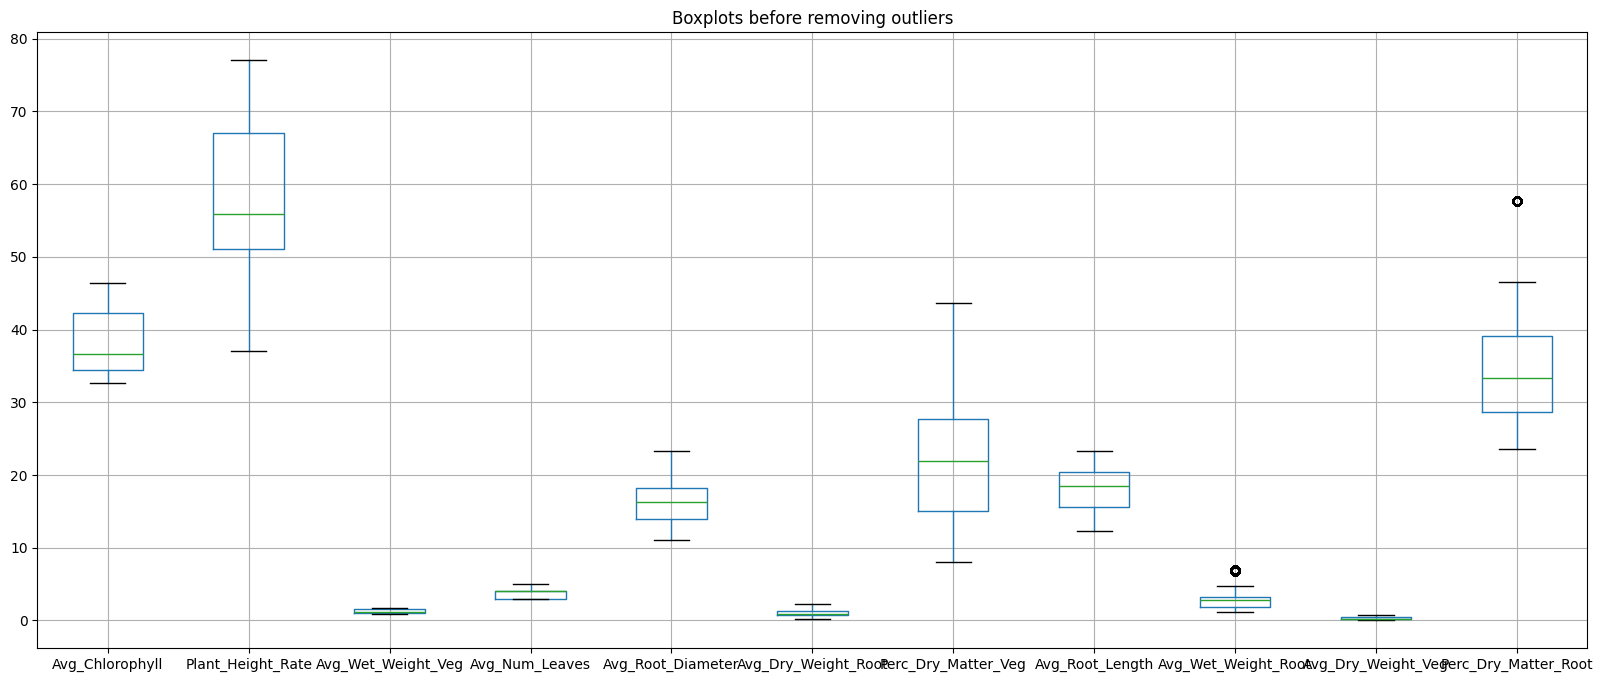

In [ ]:
import numpy as np
# Display the DataFrame summary before removing outliers
print("Summary before removing outliers:")
print(df.describe())


# Step 1: Save a copy of the column before deleting it
deleted_column_backup = df['Avg_Leaf_Area'].copy()

# Step 2: Delete the column from the DataFrame
df.drop('Avg_Leaf_Area', axis=1, inplace=True)

# At this point, the 'DeletedColumn' has been removed from the DataFrame


# Display the DataFrame to verify that the column has been re-added
print(df.head())

def remove_outliers(df, columns):
    for i, col in enumerate(columns):

        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Filtering out the outliers
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# Handle outliers using Z-score method
def remove_outliers_zscore(df, columns, threshold=3):
    for col in columns:
        z_scores = np.abs((df[col] - df[col].mean()) / df[col].std())
        df = df[z_scores < threshold]
    return df

# Columns to check for outliers
num_columns = df.select_dtypes(include=['float64']).columns

# Summary of DataFrame before removing outliers
print("Summary before removing outliers:")
print(df.describe())

# Plotting boxplots before removing outliers
plt.figure(figsize=(20, 8))
df[num_columns].boxplot()
plt.title("Boxplots before removing outliers")
plt.show()

After initially plotting the graph we realized that the Avg_Leaf_Area column has a very different range than the other columns and in treating it like the other columns the dataset was getting shrinked unjustifiably. Therefore it was deleted during the outlier detection process then re-added later.

Summary after removing outliers:
       Avg_Chlorophyll  Plant_Height_Rate  Avg_Wet_Weight_Veg  Avg_Num_Leaves  \
count     26727.000000       26727.000000        26727.000000    26727.000000   
mean         38.429628          58.842719            1.236930        3.815586   
std           4.567177          12.514776            0.250882        0.633225   
min          32.664004          37.020398            0.848351        2.959173   
25%          34.372190          50.864478            1.047548        3.008681   
50%          36.599906          55.912951            1.216429        3.995729   
75%          42.331026          67.089910            1.385139        4.007665   
max          46.431668          77.040610            1.775383        5.029713   

       Avg_Root_Diameter  Avg_Dry_Weight_Root  Perc_Dry_Matter_Veg  \
count       26727.000000         26727.000000         26727.000000   
mean           15.859965             0.886843            23.243725   
std             2.481964   

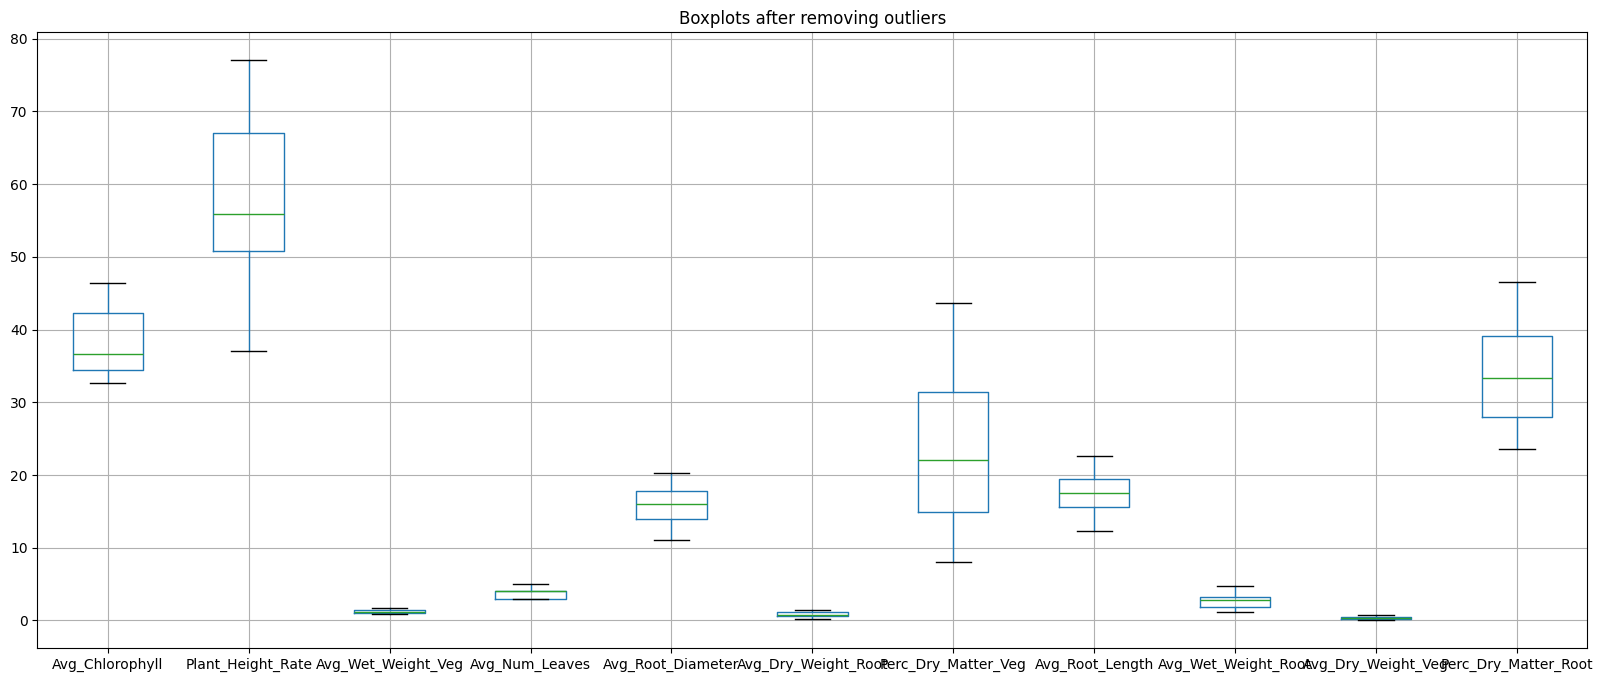

Number of rows before cleaning: 30000
Number of rows after cleaning: 26727


In [ ]:
# Removing outliers
df_cleaned = remove_outliers(df, num_columns)

# Summary of DataFrame after removing outliers
print("Summary after removing outliers:")
print(df_cleaned.describe())

# Plotting boxplots after removing outliers
plt.figure(figsize=(20, 8))
df_cleaned[num_columns].boxplot()
plt.title("Boxplots after removing outliers")
plt.show()

# Checking the number of rows before and after cleaning
print(f"Number of rows before cleaning: {len(df)}")
print(f"Number of rows after cleaning: {len(df_cleaned)}")
df= df_cleaned

In [ ]:
df.head(5)

,Identifier,Avg_Chlorophyll,Plant_Height_Rate,Avg_Wet_Weight_Veg,Avg_Num_Leaves,Avg_Root_Diameter,Avg_Dry_Weight_Root,Perc_Dry_Matter_Veg,Avg_Root_Length,Avg_Wet_Weight_Root,Avg_Dry_Weight_Veg,Perc_Dry_Matter_Root,Class
2,R2,33.100405,67.067344,1.104647,5.007652,15.980760,1.185391,19.398789,20.840822,2.861635,0.200113,41.289875,SA
4,R3,36.297008,45.588894,1.363205,4.003682,16.979894,0.777428,31.423772,17.331894,2.766242,0.424172,27.898619,SA
5,R3,36.287722,45.598585,1.353790,3.998621,16.991603,0.760842,31.403639,17.324861,2.745382,0.435148,27.927017,SA
7,R2,33.105558,67.073406,1.097444,4.991835,15.965588,1.189576,19.407307,20.838177,2.847526,0.216855,41.304762,SA
8,R2,33.092448,67.061659,1.103098,4.995131,15.964761,1.182838,19.387573,20.824335,2.857965,0.209869,41.318049,SA


In [ ]:
# Step 3: Re-add the column using the backup
df.insert(3, 'Avg_Leaf_Area', deleted_column_backup)
df.head(5)

,Identifier,Avg_Chlorophyll,Plant_Height_Rate,Avg_Leaf_Area,Avg_Wet_Weight_Veg,Avg_Num_Leaves,Avg_Root_Diameter,Avg_Dry_Weight_Root,Perc_Dry_Matter_Veg,Avg_Root_Length,Avg_Wet_Weight_Root,Avg_Dry_Weight_Veg,Perc_Dry_Matter_Root,Class
2,R2,33.100405,67.067344,1009.208996,1.104647,5.007652,15.980760,1.185391,19.398789,20.840822,2.861635,0.200113,41.289875,SA
4,R3,36.297008,45.588894,981.470310,1.363205,4.003682,16.979894,0.777428,31.423772,17.331894,2.766242,0.424172,27.898619,SA
5,R3,36.287722,45.598585,981.460993,1.353790,3.998621,16.991603,0.760842,31.403639,17.324861,2.745382,0.435148,27.927017,SA
7,R2,33.105558,67.073406,1009.239638,1.097444,4.991835,15.965588,1.189576,19.407307,20.838177,2.847526,0.216855,41.304762,SA
8,R2,33.092448,67.061659,1009.218887,1.103098,4.995131,15.964761,1.182838,19.387573,20.824335,2.857965,0.209869,41.318049,SA


In [ ]:
num_columns = df.select_dtypes(include=['float64']).columns

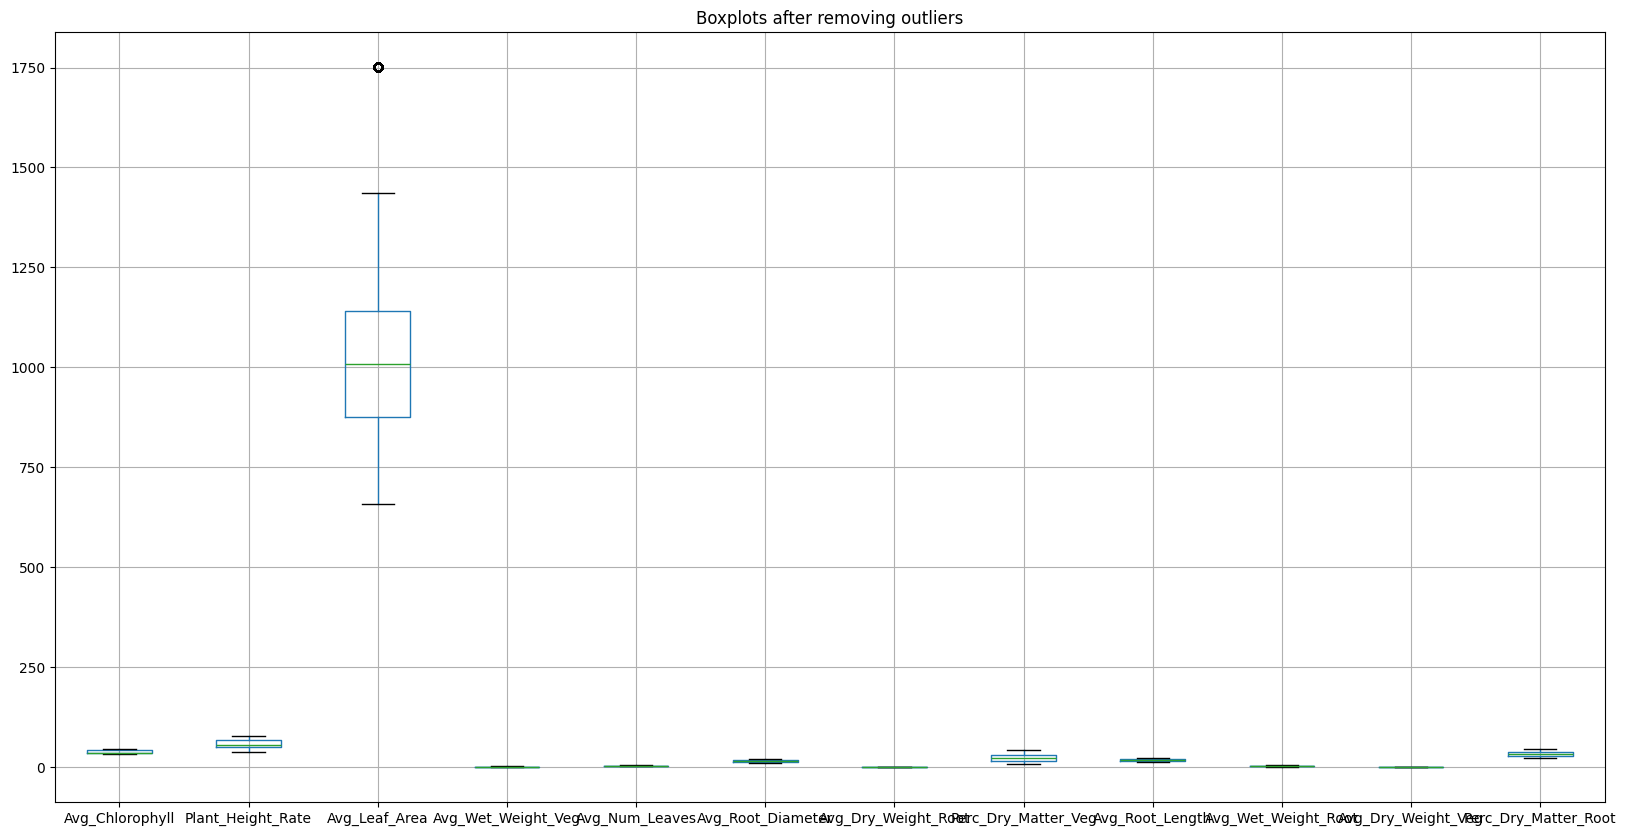

In [ ]:
# Plotting boxplots after removing outliers
plt.figure(figsize=(20, 10))
df[num_columns].boxplot()
plt.title("Boxplots after removing outliers")
plt.show()

Here after re-adding the coulmumn that was previously deleted(Reason mentioned above which is due to different ranges) we can see the real outliers more clearly so this will be handled in the upcoming steps

In [ ]:
# Specify the fourth column (index 3, as DataFrame indices are zero-based)
column_name = df.columns[3]

# Calculate Q1 (25th percentile) and Q3 (75th percentile) for the fourth column
Q1 = df[column_name].quantile(0.25)
Q3 = df[column_name].quantile(0.75)
IQR = Q3 - Q1

# Determine the upper bound
upper_bound = Q3 + 1.5 * IQR

# Filter out the values above the upper bound
df = df[df[column_name] <= upper_bound]

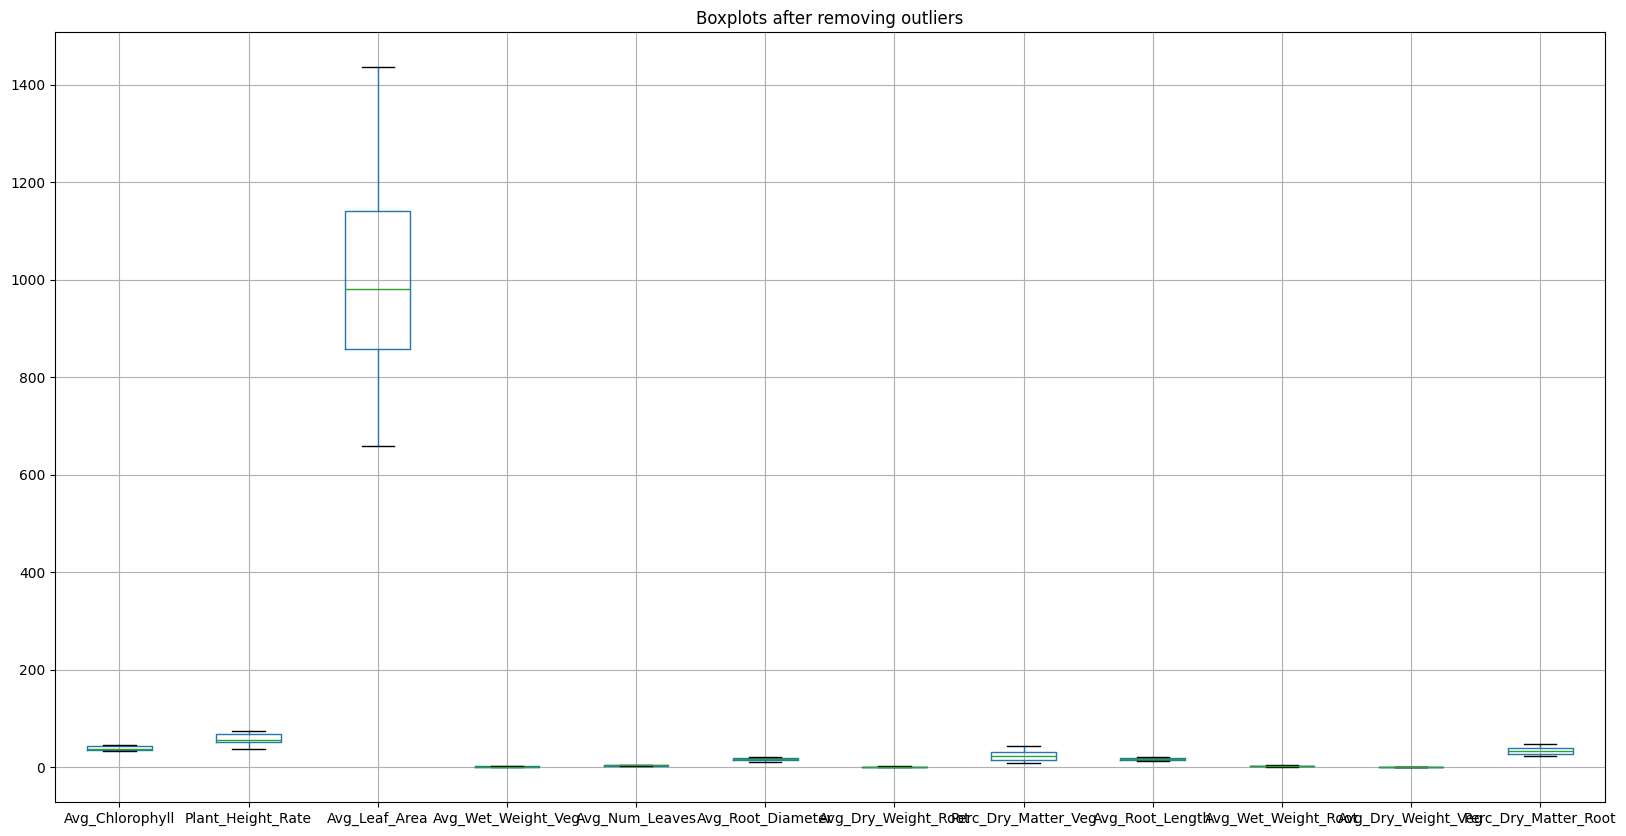

In [ ]:
# Plotting boxplots after removing outliers
plt.figure(figsize=(20, 10))
df[num_columns].boxplot()
plt.title("Boxplots after removing outliers")
plt.show()

In [ ]:
print(f"Number of rows after cleaning: {len(df)}")


Number of rows after cleaning: 25080


In [ ]:
# Assume the last column contains the classes
class_column = df.columns[-1]

# Calculate the percentage of each class
class_counts = df[class_column].value_counts()
total_count = len(df)
class_percentages = (class_counts / total_count) * 100

# Print the percentages with class names
print("Class Percentages:")
for cls, percentage in class_percentages.items():
    print(f"{cls}: {percentage:.2f}%")

Class Percentages:
TB: 19.94%
TA: 19.94%
TC: 19.94%
SC: 13.45%
SA: 13.37%
SB: 13.37%


In [ ]:
df.to_csv(output, index=False, encoding='ISO-8859-1')

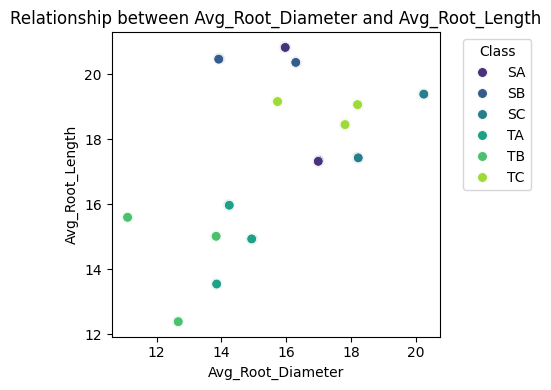

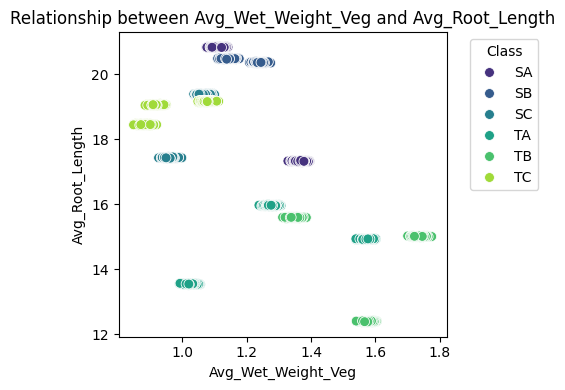

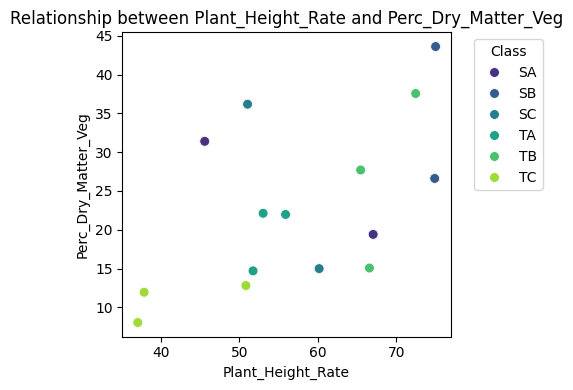

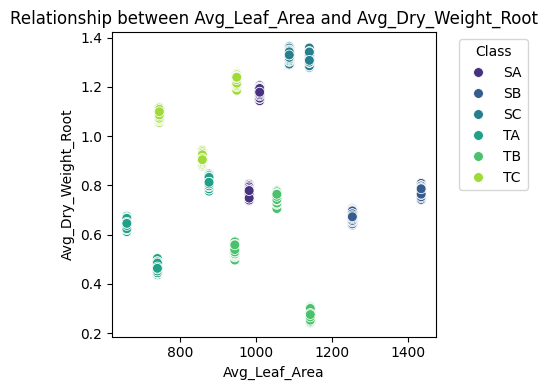

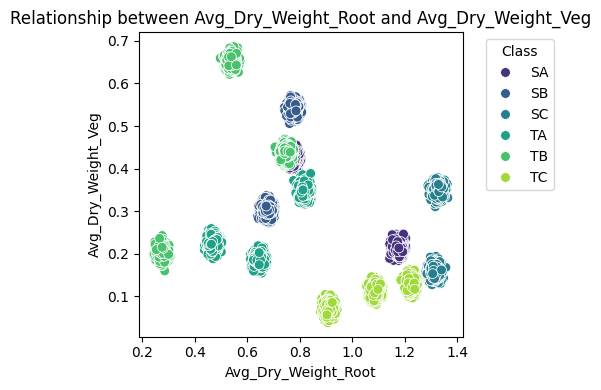

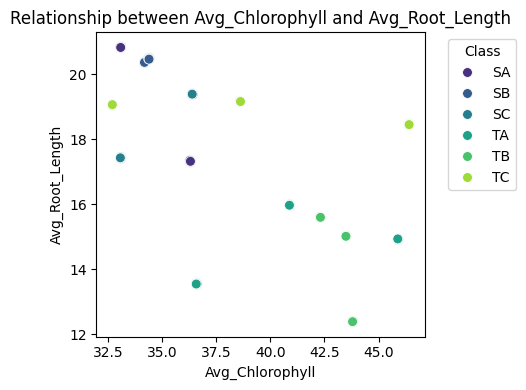

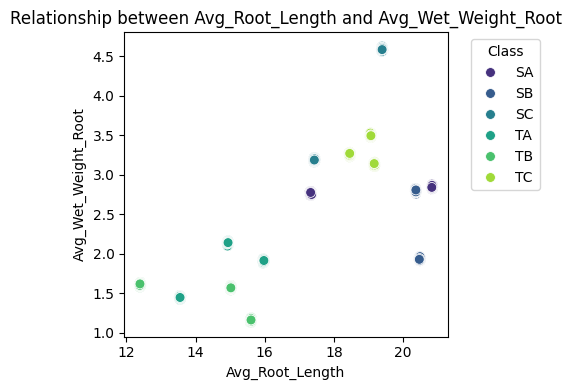

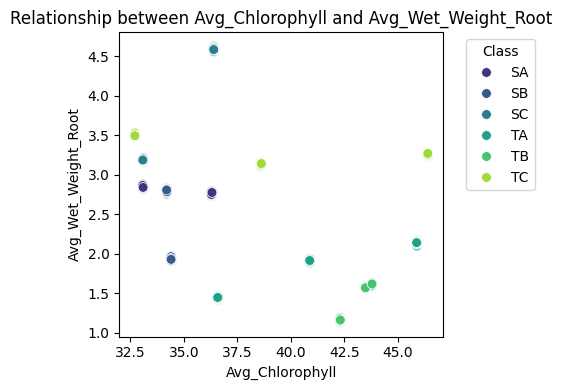

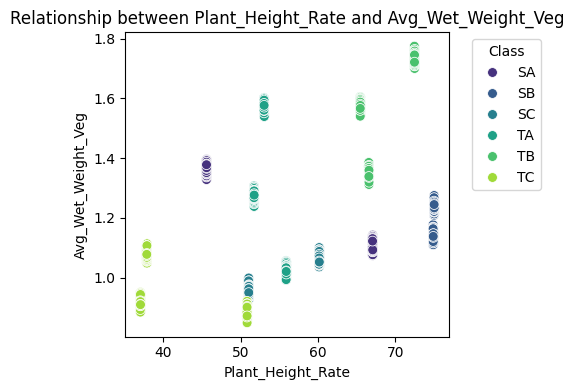

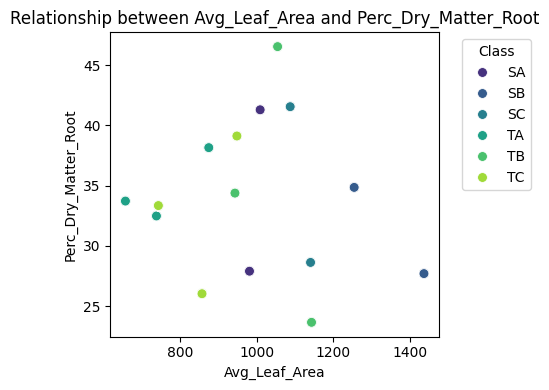

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Making scatter plots for out data
features_to_plot = [("Avg_Root_Diameter","Avg_Root_Length"),
    ("Avg_Wet_Weight_Veg","Avg_Root_Length"),
    ("Plant_Height_Rate","Perc_Dry_Matter_Veg"),
    ("Avg_Leaf_Area","Avg_Dry_Weight_Root"),
    ("Avg_Dry_Weight_Root","Avg_Dry_Weight_Veg"),
    ("Avg_Chlorophyll","Avg_Root_Length"),
    ("Avg_Root_Length","Avg_Wet_Weight_Root"),
    ("Avg_Chlorophyll","Avg_Wet_Weight_Root"),
    ("Plant_Height_Rate","Avg_Wet_Weight_Veg"),
    ("Avg_Leaf_Area","Perc_Dry_Matter_Root"),]

for x_feat, y_feat in features_to_plot:
    plt.figure(figsize=(5, 4))
    sns.scatterplot(data=df, x=x_feat, y=y_feat, hue="Class", palette="viridis", s=50)
    plt.title(f"Relationship between {x_feat} and {y_feat}")
    plt.legend(title="Class", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()


During the preprocessing stage, we renamed the original dataset columns to shorter names.

We also removed rows containing outliers using IQR and Z-Score methods. After removing the outliers, the new class distribution was as follows: classes TA,TB,TC are approximately 19.94%, while classes SA,SB,SC are around 13.37%.

# Classification Task 1 (K-NN Algorithm)

In this task K-NN Algorithm will be used on the dataset.



K-NN can use different distance metrics to determine the closest neighbors but the Euclidean works effectively for numerical continuous data and it is the default from the sklearn library.

### Data Preperation

In [ ]:
list(df.columns) # to check what columns to include and to exclude

['Identifier',
 'Avg_Chlorophyll',
 'Plant_Height_Rate',
 'Avg_Leaf_Area',
 'Avg_Wet_Weight_Veg',
 'Avg_Num_Leaves',
 'Avg_Root_Diameter',
 'Avg_Dry_Weight_Root',
 'Perc_Dry_Matter_Veg',
 'Avg_Root_Length',
 'Avg_Wet_Weight_Root',
 'Avg_Dry_Weight_Veg',
 'Perc_Dry_Matter_Root',
 'Class']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



# Separate features and target
X = df.drop(columns=["Class", "Identifier"])  # Exclude 'Identifier' column
y = df[class_column]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Feature Scaling

In [ ]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Feature scaling was applied to make sure that every feature has the same contribution to avoid biased neighbor selection.

### K-NN:Choosing K

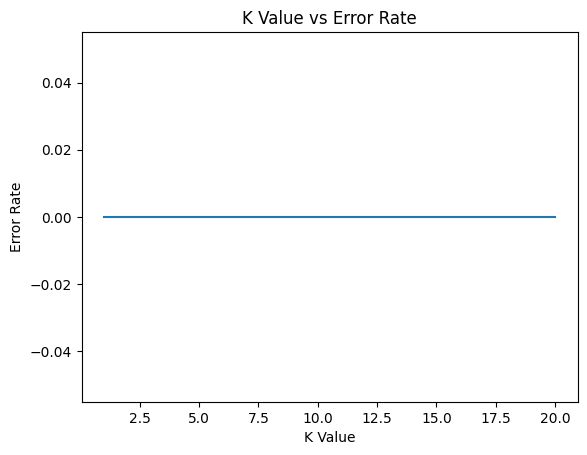

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
# Experiment with different K values
errors = []
k_values = range(1, 21)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)  # Use the previously split and prepared data
    y_pred = knn.predict(X_test)
    errors.append(1 - accuracy_score(y_test, y_pred))

# Plot K values vs Error Rate
plt.plot(k_values, errors)
plt.xlabel('K Value')
plt.ylabel('Error Rate')
plt.title('K Value vs Error Rate')
plt.show()

The range of 1 to 21 was tested and according to the plot the error rate remains at 0 for all the values which means that the feature standardization is highly effective leading to excellent performance. Additionally, there is no overfitting(low k value) or underfitting( high k value) depending on the plot because the error rate remains 0. Therefore, The optimum K value can be any of the values in the range.

### K-NN: Model Performance

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score


# Train model with the best K
knn = KNeighborsClassifier(n_neighbors=5) # 5 was chosen randomely since it does not make any difference
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Classification report
report1 = classification_report(y_test, y_pred)
print("Classification Report:")
print(report1)

acc_knn = accuracy_score(y_test, y_pred)
pre_knn = precision_score(y_test, y_pred, average='weighted', zero_division=0)
rec_knn = recall_score(y_test, y_pred, average='weighted')


Confusion Matrix:
[[1001    0    0    0    0    0]
 [   0 1024    0    0    0    0]
 [   0    0 1028    0    0    0]
 [   0    0    0 1492    0    0]
 [   0    0    0    0 1516    0]
 [   0    0    0    0    0 1463]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1001
           1       1.00      1.00      1.00      1024
           2       1.00      1.00      1.00      1028
           3       1.00      1.00      1.00      1492
           4       1.00      1.00      1.00      1516
           5       1.00      1.00      1.00      1463

    accuracy                           1.00      7524
   macro avg       1.00      1.00      1.00      7524
weighted avg       1.00      1.00      1.00      7524



The fact that all diagonal elements match the number of occurrences for each class and every other element is zero(meaning there are no misclassifications) indicates that the algorithm has achieved excellent results. To prove this the classification reports confirm it by showing that the precision, recall and F1-score is 1.00 for each class and the accuracy is also 1.

### K-NN: Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score

# Perform k-fold cross-validation
k_fold = 10  # Number of folds
cv_scores = cross_val_score(knn, X, y, cv=k_fold)

print("Cross-validation scores:")
print(cv_scores)
print(f"Mean cross-validation score: {cv_scores.mean()}")

Cross-validation scores:
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean cross-validation score: 1.0


To sum up, in doing the cross validation of the KNN model K-fold was used because it is effective and reliable in testing the generalization of the model due to the fact that it separated the data into 10 folds and in each fold the model was trained and tested on different parts of the dataset. The cross validation ensured that there is no underfitting or overfitting and that was proven by the excellent results where all the scores were 1 achieving a perfect classification

# Classification Task 2 (SVM Algorithm)

In this task, we are going to build a classification model using Support Vector Machine SVM. Our goal here is to predict the class of plant samples based on different measured features.
Since the dataset includes multiple classes, we will use different nonlinear kernels in SVM to see which one gives the best performance.

### Importing libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.decomposition import PCA

### Feature and Target Selection

In [ ]:
X = df.drop(columns=["Identifier", "Class"])
y = df["Class"]

### Encode and Scale Data

In [ ]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

SVMs are sensitive to the scale of features. Scaling ensures each feature contributes equally to the model's decision function.

### Split Dataset

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.3, random_state=42)

### Visualize using PCA (2D)

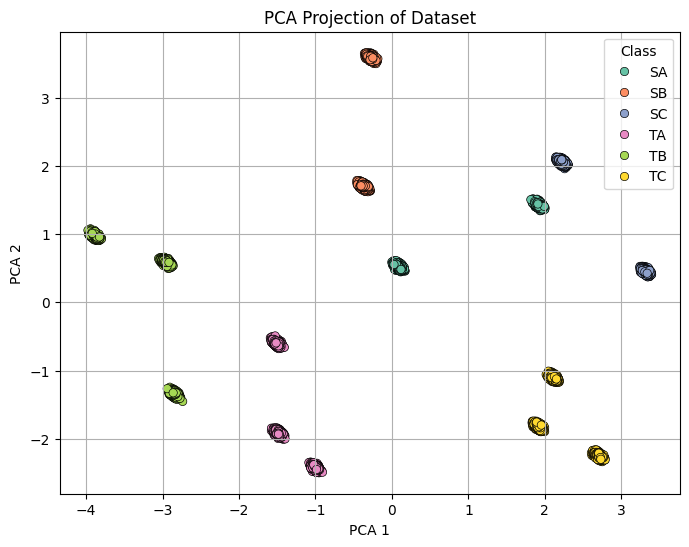

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette='Set2', edgecolor='black')
plt.title("PCA Projection of Dataset")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)
plt.show()

From the scatter plot we can clearly see that the different classes are well-separated in 2D space.
Each class forms a distinct cluster with no visible overlap, which means the dataset is highly separable.
This gives us confidence that SVM (especially with nonlinear kernels) will be able to classify the data accurately.
In short, this is a clean and easy-to-work-with dataset, and we expect excellent performance from our models.

### Try different nonlinear kernels with their confusion matrices & cross-validation

In [ ]:
kernels = ['rbf', 'poly', 'sigmoid']

for kernel in kernels:
    print(f"\n {kernel.upper()} KERNEL ")

    # Train the model
    model = SVC(kernel=kernel, C=1.0, gamma='scale')
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Evaluate performance
    acc_svm = accuracy_score(y_test, y_pred)
    prec_svm = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    rec_svm = recall_score(y_test, y_pred, average='weighted')
    cm = confusion_matrix(y_test, y_pred)

    print("Accuracy:", round(acc_svm, 4))
    print("Precision:", round(pre_svm, 4))
    print("Recall:", round(rec_svm, 4))
    print("Confusion Matrix:")
    print(cm)

    cv_scores = cross_val_score(model, X_scaled, y_encoded, cv=10)
    print("\nCross-validation scores:")
    print(cv_scores)
    print("Mean cross-validation score:", round(cv_scores.mean(), 4))



 RBF KERNEL 
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
Confusion Matrix:
[[1001    0    0    0    0    0]
 [   0 1024    0    0    0    0]
 [   0    0 1028    0    0    0]
 [   0    0    0 1492    0    0]
 [   0    0    0    0 1516    0]
 [   0    0    0    0    0 1463]]

Cross-validation scores:
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean cross-validation score: 1.0

 POLY KERNEL 
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
Confusion Matrix:
[[1001    0    0    0    0    0]
 [   0 1024    0    0    0    0]
 [   0    0 1028    0    0    0]
 [   0    0    0 1492    0    0]
 [   0    0    0    0 1516    0]
 [   0    0    0    0    0 1463]]

Cross-validation scores:
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean cross-validation score: 1.0

 SIGMOID KERNEL 
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
Confusion Matrix:
[[1001    0    0    0    0    0]
 [   0 1024    0    0    0    0]
 [   0    0 1028    0    0    0]
 [   0    0    0 1492    0    0]
 [   0    0    0    0 1516    0]
 [   0    0    0    0    0 1463

All three kernels gave perfect results in terms of accuracy, precision, recall, and even cross-validation.
This means the dataset is very well-prepared and the classes are highly separable.


### SVM Summary

##### In this task, we used SVM to classify plant samples based on different features. Since the dataset had more than two classes, we focused on nonlinear kernels (RBF, Polynomial, and Sigmoid) instead of linear separation. After scaling the features and encoding the labels, we visualized the data using PCA, which showed that the classes are clearly separated. We trained and tested all three kernels and found that they all achieved perfect results in terms of accuracy, precision, recall, and 10-fold cross-validation. This tells us that the data is very clean and easy to separate, and that SVM works really well for this task. Even though all kernels performed the same, RBF is generally the safest and most flexible choice.

# Classification Task 3 (Deep Learning)

### Data preparation

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pandas as pd
# Separate features and target
X = df.drop(columns=["Class", "Identifier"])  # Exclude 'Identifier' column
y = df[class_column]
# Encode categorical labels
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

# Apply standardization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


##### The dataset was prepared by firstly separating features and the target, then encoding categorical labels into numerical using LabelEncoder, which is important for multi-class classification using neural networks. After that, we split the data into training and testing sets, Finally, feature scaling was performed using StandardScaler. Standardization was good practice for Tanh activation functions since tanh is better to use when input features are centered around zero. This ensures that no single feature disproportionately affects the classification and helps the model perform more efficiently.

### Neural Network Creation

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Defining the NN architecture
num_classes = pd.Series(y_train).nunique()

model = Sequential([ Dense(128, activation='tanh', input_shape=(X_train.shape[1],)),
    Dropout(0.4),
    Dense(64, activation='tanh'),
    Dropout(0.3),
    Dense(32, activation='tanh'),
    Dense(num_classes, activation='softmax')])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compiling the model with Adam optimizer wiht a 0.001 learning rate
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Training the model
history = model.fit(X_train, y_train, epochs=20, batch_size=64, validation_split=0.2, verbose=1)

Epoch 1/20
220/220 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8353 - loss: 0.5756 - val_accuracy: 1.0000 - val_loss: 0.0124
Epoch 2/20
220/220 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 1.0000 - loss: 0.0200 - val_accuracy: 1.0000 - val_loss: 0.0037
Epoch 3/20
220/220 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 1.0000 - loss: 0.0071 - val_accuracy: 1.0000 - val_loss: 0.0019
Epoch 4/20
220/220 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 1.0000 - loss: 0.0039 - val_accuracy: 1.0000 - val_loss: 0.0011
Epoch 5/20
220/220 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 1.0000 - loss: 0.0025 - val_accuracy: 1.0000 - val_loss: 7.7193e-04
Epoch 6/20
220/220 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 1.0000 - loss: 0.0016 - val_accuracy: 1.0000 - val_loss: 5.5749e-04
Epoch 7/20
220/220 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 0.0012 - val_accuracy: 1.0000 - val_loss: 4.2113e-04
Epoch 8/20
220/220 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 9.1913e-04 - 

In [ ]:
# Evaluating the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)

In [ ]:
# Getting predictions
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)

236/236 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [ ]:
from sklearn.metrics import precision_score, recall_score

# Calculating metrics
precision = precision_score(y_test, y_pred_classes, average="weighted") * 100
recall = recall_score(y_test, y_pred_classes, average="weighted") * 100
accuracy = test_accuracy * 100

# Displaying metrics
print("Accuracy = ", accuracy)
print("Precision = ", precision)
print("Recall = ", recall)

Accuracy =  100.0
Precision =  100.0
Recall =  100.0


In [ ]:
# Calculating the confusion matrix
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)  # Converting predicted probabilities to class labels

conf_matrix_dl = confusion_matrix(y_test, y_pred_classes)

# Printing the confusion matrix
print("Confusion Matrix:")
print(conf_matrix_dl)


236/236 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Confusion Matrix:
[[1001    0    0    0    0    0]
 [   0 1024    0    0    0    0]
 [   0    0 1028    0    0    0]
 [   0    0    0 1492    0    0]
 [   0    0    0    0 1516    0]
 [   0    0    0    0    0 1463]]


In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
import numpy as np

# Initialize list to store cross-validation accuracies
cv_accuracies = []

# Perform Stratified K-Fold cross-validation
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)  # Define the splitter

for fold, (train_index, test_index) in enumerate(skf.split(X, y_encoded)):  # Iterate over folds
    X_train_cv, X_test_cv = X.iloc[train_index], X.iloc[test_index]  # Split data for this fold
    y_train_cv, y_test_cv = y_encoded[train_index], y_encoded[test_index]

    # Apply standardization to this fold's data
    scaler = StandardScaler()
    X_train_cv = scaler.fit_transform(X_train_cv)
    X_test_cv = scaler.transform(X_test_cv)

    # Train the model
    model.fit(X_train_cv, y_train_cv, epochs=20, batch_size=64, verbose=0)

    # Evaluate
    y_pred = model.predict(X_test_cv)
    y_pred_classes = y_pred.argmax(axis=1)
    acc = accuracy_score(y_test_cv, y_pred_classes) * 100
    cv_accuracies.append(acc)

    print(f"Fold {fold+1} Accuracy: {acc:.2f}%")

# Final result
print("\n--- Cross-Validation Accuracy ---")
print("Fold Accuracies:", [f"{a:.2f}%" for a in cv_accuracies])
print(f"Mean Accuracy: {np.mean(cv_accuracies):.2f}%")

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Fold 1 Accuracy: 100.00%
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Fold 2 Accuracy: 100.00%
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Fold 3 Accuracy: 100.00%
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Fold 4 Accuracy: 100.00%
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Fold 5 Accuracy: 100.00%
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Fold 6 Accuracy: 100.00%
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Fold 7 Accuracy: 100.00%
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Fold 8 Accuracy: 100.00%
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Fold 9 Accuracy: 100.00%
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Fold 10 Accuracy: 100.00%

--- Cross-Validation Accuracy ---
Fold Accuracies: ['100.00%', '100.00%', '100.00%', '100.00%', '100.00%', '100.00%', '100.00%', '100.00%', '100.00%', '100.00%']
Mean Accuracy: 100.00%


### NN Summary

#### In this task, we categorized plant samples using NN model.The model was trained for 20 epochs using a reasonably sized batch.

#### After training, the model showed perfect accuracy, precision, and recall, which indicate that the neural network was able to learn the trends of the data. It is more complex than the other models, but more flexible and capable of modeling complex relationships.

#### Overall, NN is highly recommmended for data with complex relationships and datasets that are expected to have frequent changes in the samples.

# Camparison of all algorithms

All three models provided perfect results in terms of accuracy and precision. However, SVM with RBF
kernel is the best because it is not only accurate, but also fast and shows great handling of multi class
separability.

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

# --- K-NN Results ---
print("K-NN Metrics")
print("Accuracy: ", acc_knn * 100)
print("Precision:", pre_knn * 100)
print("Recall:   ", rec_knn * 100)


# --- SVM Results ---
print("\nSVM Metrics")
print("Accuracy: ", acc_svm * 100)
print("Precision:", pre_svm * 100)
print("Recall:   ", rec_svm * 100)

# --- CNN Results ---
print("\nCNN Metrics")
print("Accuracy: ", accuracy)
print("Precision:", precision)
print("Recall:   ", recall)




K-NN Metrics
Accuracy:  100.0
Precision: 100.0
Recall:    100.0

SVM Metrics
Accuracy:  100.0
Precision: 100.0
Recall:    100.0

CNN Metrics
Accuracy:  100.0
Precision: 100.0
Recall:    100.0


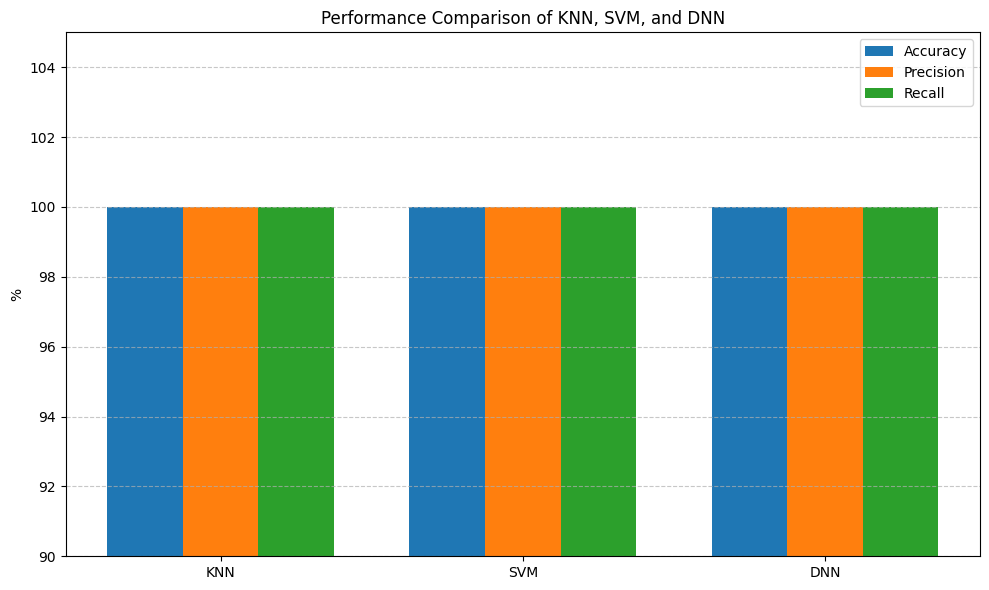

In [ ]:
import matplotlib.pyplot as plt



accuracy_vals = [acc_knn * 100, acc_svm * 100, accuracy]
precision_vals = [pre_knn * 100, pre_svm * 100, precision]
recall_vals = [rec_knn * 100, rec_svm * 100, recall]
labels = ['KNN', 'SVM', 'DNN']

x = range(len(labels))
width = 0.25

plt.figure(figsize=(10,6))
plt.bar([i - width for i in x], accuracy_vals, width=width, label='Accuracy')
plt.bar(x, precision_vals, width=width, label='Precision')
plt.bar([i + width for i in x], recall_vals, width=width, label='Recall')

plt.xticks(x, labels)
plt.ylim(90,105)
plt.ylabel("%")
plt.title("Performance Comparison of KNN, SVM, and DNN")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Failure Cases and Limitations

##### Even though we didn’t face any failure cases while training or testing the models, there are still situations where they might not perform as well. Our dataset was clean and the classes were easy to separate, which may not be the case with more complicated or noisy data. Also, since we trained the models on data from one specific greenhouse, they might not give the same results if we try them on data from a different environment or under different conditions.

# Conclusion
##### The data was collected from the Agriculture Lab on plants that grow in an IoT greenhouse and a Traditional greenhouse. Having a classifier can help people majoring in IoT evaluate the quality of the IoT greenhouse and whether it is more efficient to use IoT greenhouses instead of traditional greenhouses. That information can help us understand the drawbacks of IoT greenhouses and develop them to be used in a wider range.

##### In this project, we applied and evaluated three different classification models: K-Nearest Neighbors(KNN), Support Vector Machines(SVM),and Deep Neural Networks(DNN), and they all worked perfectly with our data, and gave 100% accuracy.